# Importação dos dados



## Importando

In [2]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


## Criando função "armazenandoDados" para armazenar dados de arquivo DataFrame em matrizes

In [3]:
# será aplicado individualmente em casa arquivo
def armazenandoDados(arquivo_csv: list) -> list:
  '''
    Essa função é aplicada individualmente em cada arquivo, convertendo arquivos DataFrame do Pandas
    em matrizes. Cada linha representa um produto e seus detalhes de compra.
  '''
  try:
    matriz = []
    for produto in arquivo_csv.values:
      matriz.append(produto.tolist())
  except TypeError as e:
    print(e)
  else:
      return matriz

## Implementando a função "armazenandoDados" nos arquivos

---



In [4]:
loja1_matriz = armazenandoDados(loja1)
loja2_matriz = armazenandoDados(loja2)
loja3_matriz = armazenandoDados(loja3)
loja4_matriz = armazenandoDados(loja4)

#1. Análise do faturamento


Nesta primeira análise, você deve calcular o faturamento total de cada loja. Somando os valores da coluna Preço de cada loja para estimar o faturamento.



In [39]:
def calcularFaturamento(lista1: list, lista2: list, lista3: list, lista4: list) -> dict:
  '''
  Essa função cria uma lista com as matriz recebidas como argumento na chamada da função.
  A função tem um loop que percorre cada matriz, e dentro desse loop há outro loop, na qual ele
  percorre cada linha da matriz do loop maior, coletando seu valor de indice 2.
  Acumula esses valores em uma variavel, que ao final do loop menor, é armazenado em um dicionario,
  aonde cada chave representa a sua matriz.
  Por fim retorna o dicionario contendo o faturamento de cada loja.
  '''

  valores_faturamento = {}
  iteravel_parametro = (lista1, lista2, lista3, lista4)
  i = 0
  valor = 0

  for matriz in iteravel_parametro:
    for linha_matriz in matriz:
      valor += linha_matriz[2]
    i += 1
    valores_faturamento[f"loja{i}"] = round(valor)
    valor = 0

  return valores_faturamento

faturamento_lojas = calcularFaturamento(loja1_matriz, loja2_matriz, loja3_matriz, loja4_matriz)
print(faturamento_lojas)

{'loja1': 1534509, 'loja2': 1488459, 'loja3': 1464025, 'loja4': 1384498}


# 2. Vendas por Categoria


Neste passo, deve calcular a quantidade de produtos vendidos por categoria em cada loja. A ideia é agrupar os dados por categoria e contar o número de vendas de cada tipo, mostrando as categoria mais populares de cada loja



In [130]:
def consultarVendaPorCategoria(lista1: list, lista2: list, lista3: list, lista4: list) -> dict:
  '''
  Essa função percorre cada linha de cada matriz e armazena a quantidade de vezes que cada categoria aparece.
  Depois com base no resultado de venda por categoria, armazena qual categoria teve mais e menos venda em cada loja.
  Armazena esses valores em um lista de dicionarios, aonde estão classificados por lojas.
  '''
  categorias_qtds_temporario = {}
  matriz_maiorValor_categoriasQtd = {}
  iteravel_parametro = (lista1, lista2, lista3, lista4)
  i = 1

  for matriz in iteravel_parametro:
    for linha_matriz in matriz:
      categoria = linha_matriz[1]
      categorias_qtds_temporario[categoria] = categorias_qtds_temporario.get(categoria, 0) + 1

    maior_valor = max(categorias_qtds_temporario, key=categorias_qtds_temporario.get)
    menor_valor = min(categorias_qtds_temporario, key=categorias_qtds_temporario.get)
    matriz_maiorValor_categoriasQtd[i - 1] = {
        "loja": f"loja{i}",
        "categoria_maior_venda": maior_valor,
        "categoria_menor_venda": menor_valor,
        "qtd_categorias": categorias_qtds_temporario
    }
    i += 1
    categorias_qtds_temporario = {}
  return matriz_maiorValor_categoriasQtd

venda_por_categoria = consultarVendaPorCategoria(loja1_matriz, loja2_matriz, loja3_matriz, loja4_matriz)
print(venda_por_categoria)

{0: {'loja': 'loja1', 'categoria_maior_venda': 'moveis', 'categoria_menor_venda': 'utilidades domesticas', 'qtd_categorias': {'eletronicos': 448, 'moveis': 465, 'brinquedos': 324, 'eletrodomesticos': 312, 'utilidades domesticas': 171, 'esporte e lazer': 284, 'livros': 173, 'instrumentos musicais': 182}}, 1: {'loja': 'loja2', 'categoria_maior_venda': 'moveis', 'categoria_menor_venda': 'utilidades domesticas', 'qtd_categorias': {'moveis': 442, 'instrumentos musicais': 224, 'esporte e lazer': 275, 'eletronicos': 422, 'utilidades domesticas': 181, 'brinquedos': 313, 'eletrodomesticos': 305, 'livros': 197}}, 2: {'loja': 'loja3', 'categoria_maior_venda': 'moveis', 'categoria_menor_venda': 'instrumentos musicais', 'qtd_categorias': {'eletrodomesticos': 278, 'moveis': 499, 'instrumentos musicais': 177, 'esporte e lazer': 277, 'eletronicos': 451, 'brinquedos': 315, 'utilidades domesticas': 177, 'livros': 185}}, 3: {'loja': 'loja4', 'categoria_maior_venda': 'moveis', 'categoria_menor_venda': 'in

# 3. Média de Avaliação das Lojas

Neste passo, vamos calcular a média das avaliações dos clientes para cada loja. O objetivo é entender a satisfação dos clientes com os produtos vendidos.



In [132]:
def consultarVendaPorCategoria(lista1: list, lista2: list, lista3: list, lista4: list) -> dict:
  '''
  Essa função soma a avaliação de todos os clientes por loja e calcula a média de avaliação por loja.
  '''
  avaliacao = []
  iteravel_parametro = (lista1, lista2, lista3, lista4)
  satisfacao_por_loja = {}
  i = 1

  for matriz in iteravel_parametro:
    for linha_matriz in matriz:
      avaliacao.append(linha_matriz[7])

    satisfacao_por_loja[f"loja{i}"] = round(sum(avaliacao) / len(avaliacao), 2)
    i += 1
    avaliacao = []

  return satisfacao_por_loja

satisfacao_por_loja = consultarVendaPorCategoria(loja1_matriz, loja2_matriz, loja3_matriz, loja4_matriz)
print(satisfacao_por_loja)


{'loja1': 3.98, 'loja2': 4.04, 'loja3': 4.05, 'loja4': 4.0}


# 4. Produtos Mais e Menos Vendidos

Neste passo, deve identificar quais produtos foram os mais vendidos e os menos vendidos em cada loja.  Ao final, visualize os resultados de forma que fique claro quais produtos se destacaram nas vendas de cada loja.



In [141]:
def consultarVendaPorProduto(lista1: list, lista2: list, lista3: list, lista4: list) -> dict:
  '''
  Essa função percorre cada linha de cada matriz e armazena a quantidade de vezes que cada categoria aparece.
  Depois com base no resultado de venda por categoria, armazena qual categoria teve mais e menos venda em cada loja.
  Armazena esses valores em um lista de dicionarios, aonde estão classificados por lojas.
  '''
  produto_qtds_temporario = {}
  matriz_maiorValor_produtoQtd = {}
  iteravel_parametro = (lista1, lista2, lista3, lista4)
  i = 1

  for matriz in iteravel_parametro:
    for linha_matriz in matriz:
      categoria = linha_matriz[0]
      produto_qtds_temporario[categoria] = produto_qtds_temporario.get(categoria, 0) + 1

    maior_valor = max(produto_qtds_temporario, key=produto_qtds_temporario.get)
    menor_valor = min(produto_qtds_temporario, key=produto_qtds_temporario.get)
    matriz_maiorValor_produtoQtd[i - 1] = {
        "loja": f"loja{i}",
        "produto_maior_venda": maior_valor,
        "produto_menor_venda": menor_valor,
        "qtd_produto": produto_qtds_temporario
    }
    i += 1
    produto_qtds_temporario = {}
  return matriz_maiorValor_produtoQtd

venda_por_produto = consultarVendaPorProduto(loja1_matriz, loja2_matriz, loja3_matriz, loja4_matriz)
print(venda_por_produto)

{0: {'loja': 'loja1', 'produto_maior_venda': 'Micro-ondas', 'produto_menor_venda': 'Headset', 'qtd_produto': {'Assistente virtual': 40, 'Mesa de jantar': 40, 'Jogo de tabuleiro': 43, 'Micro-ondas': 60, 'Cadeira de escritório': 46, 'Blocos de montar': 56, 'Boneca bebê': 40, 'Lava louças': 48, 'Lavadora de roupas': 47, 'Carrinho controle remoto': 52, 'Geladeira': 54, 'Fone de ouvido': 50, 'Panela de pressão': 35, 'Bicicleta': 54, 'Ciência de dados com python': 39, 'Bola de vôlei': 42, 'Xadrez de madeira': 49, 'TV Led UHD 4K': 60, 'Copo térmico': 54, 'Kit banquetas': 44, 'Dashboards com Power BI': 42, 'Faqueiro': 52, 'Jogo de panelas': 43, 'Bateria': 53, 'Corda de pular': 40, 'Fogão': 45, 'Cama box': 44, 'Impressora': 54, 'Cômoda': 56, 'Guarda roupas': 60, 'Dinossauro Rex': 40, 'Guitarra': 47, 'Secadora de roupas': 58, 'Sofá retrátil': 46, 'Tablet ABXY': 42, 'Cubo mágico 8x8': 44, 'Jogo de copos': 41, 'Modelagem preditiva': 51, 'Celular Plus X42': 49, 'Mochila': 39, 'Bola de basquete': 55

# 5. Frete Médio por Loja


Neste passo, vamos calcular o custo médio de frete para cada loja. O objetivo é entender quanto, em média, está sendo gasto com frete para cada uma das lojas.



In [134]:
def freteMedioPorLoja(lista1: list, lista2: list, lista3: list, lista4: list) -> dict:
  '''
  Essa função soma o total de fretes de cada loja e calcula a média de frete referente a cada loja.
  Os dados foram importados da função "consultarVendaPorCategoria"
  '''
  frete = []
  iteravel_parametro = (lista1, lista2, lista3, lista4)
  frete_medio_por_loja = {}
  i = 1

  for matriz in iteravel_parametro:
    for linha_matriz in matriz:
      frete.append(linha_matriz[3])

    frete_medio_por_loja[f"loja{i}"] = round(sum(frete) / len(frete), 2)
    i += 1
    frete = []

  return frete_medio_por_loja

frete_medio_por_loja = freteMedioPorLoja(loja1_matriz, loja2_matriz, loja3_matriz, loja4_matriz)
print(frete_medio_por_loja)

{'loja1': 34.69, 'loja2': 33.62, 'loja3': 33.07, 'loja4': 31.28}


# Gráficos

- grafico de faturamento de cada loja (qual tem menos faturamento)
- grafico media de avaliação (qual tem a avaliação mais baixa)
- grafico media de frete (qual cobra mais)

In [7]:
import matplotlib.pyplot as plt
import numpy as np

lojas = ('Loja 1', 'Loja 2', 'Loja 3', 'Loja 4')

## Gráfico 1: Faturamento por cada loja

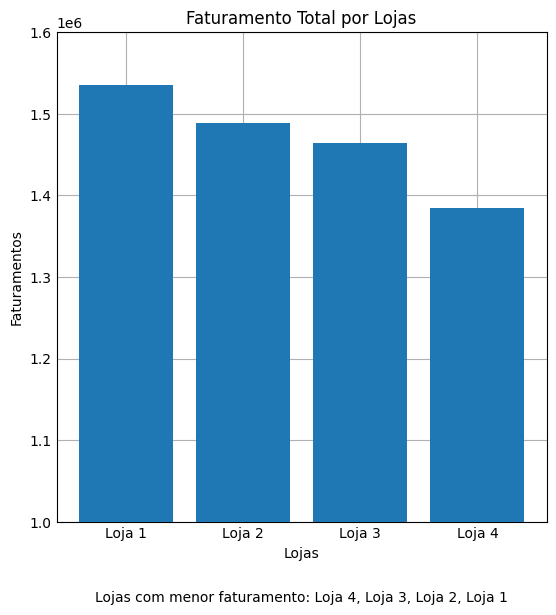

In [116]:
valor = list(faturamento_lojas.values())
plt.subplots(figsize=(5, 5))
plt.bar(lojas, valor, zorder=3)
plt.xlabel('Lojas')
plt.ylabel('Faturamentos')
plt.title('Faturamento Total por Lojas')
plt.grid(True, axis='y',zorder=0)
plt.figtext(0.5, -0.15, "Lojas com menor faturamento: Loja 4, Loja 3, Loja 2, Loja 1",
            wrap=True, horizontalalignment='center', fontsize=10)
plt.ylim(1000000, 1600000)
plt.show()


## Gráfico 2: Média de avaliação por loja

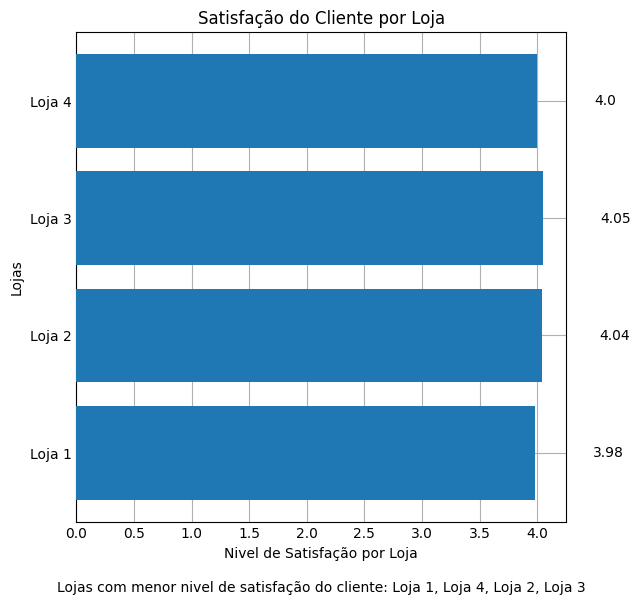

In [128]:
valor = list(satisfacao_por_loja.values())
plt.subplots(figsize=(5, 5))
plt.barh(lojas, valor, zorder=3)
plt.grid(True, axis='x',zorder=0)

for i, valor in enumerate(valor):
    plt.text(valor + 0.5, i, str(valor), va='center')

plt.title('Satisfação do Cliente por Loja')
plt.xlabel('Nivel de Satisfação por Loja')
plt.ylabel('Lojas')
plt.figtext(0.5, -0.13, "Lojas com menor nivel de satisfação do cliente: Loja 1, Loja 4, Loja 2, Loja 3",
            wrap=True, horizontalalignment='center', fontsize=10)

plt.show()

## Gráfico 3: Média de frete por loja

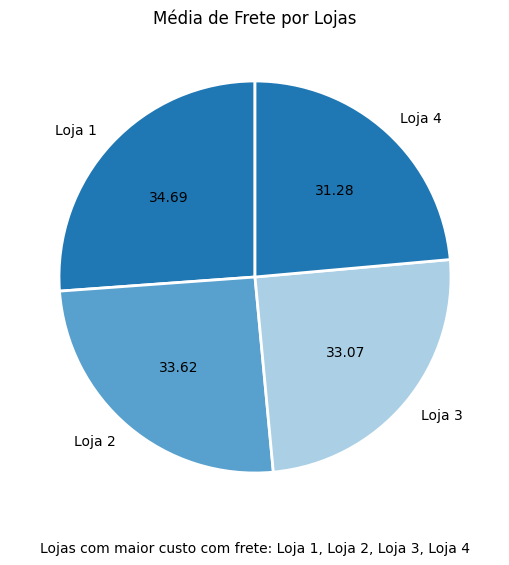

In [127]:
valores = (frete_medio_por_loja.values())
fig, ax = plt.subplots(figsize=(5, 5))

plt.title("Média de Frete por Lojas")
ax.pie(valores, labels=lojas,
       autopct=lambda p: f'{p * sum(valores) / 100:.2f}',
       wedgeprops={"linewidth": 2, "edgecolor": "white"},
       startangle=90)
plt.figtext(0.5, -0.05, "Lojas com maior custo com frete: Loja 1, Loja 2, Loja 3, Loja 4",
            wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

# Análise final: Qual loja deve ser vendida.

## Faturamento Total das Lojas

Extraindo os dados das lojas, foi constado que o total de faturamento de cada loja é respectivamente: Loja 1 teve 15.345,09, Loja 2 teve 14.884,59, Loja 3 teve 14.640,25 e Loja 4 teve 13.844,98.

As lojas com menores faturamento é Loja 4, Loja 3, Loja 2 e Loja 1.





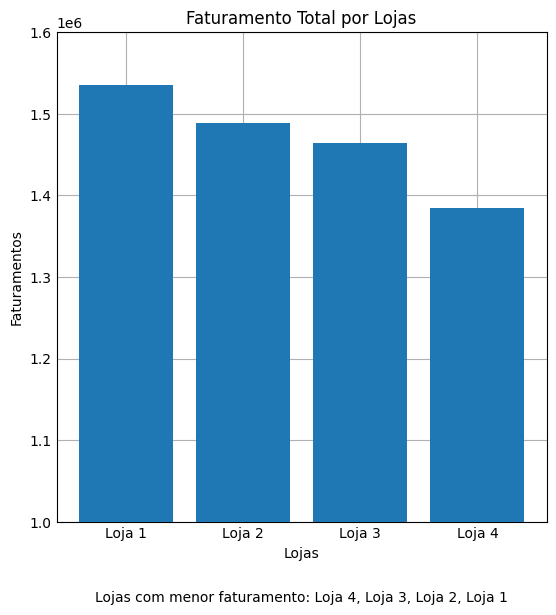

## As Categorias de Produtos Mais e Menos Vendidas.

Analisando as categorias de venda por loja, foi identificado que:


*   Loja 1 teve como categoria com maior venda **móveis** e menor venda **utilidades domésticas**.
*   Loja 2 teve como categoria com maior venda **móveis** e menor venda **utilidades doméstica**s.
*   Loja 3 teve como categoria com maior venda **móveis** e menor venda **instrumentos musicais**.
*   Loja 4 teve como categoria com maior venda **móveis** e menor venda **instrumentos musicais**.








## Média das Avaliações de Clientes por Loja.

Extraindo os dados das lojas, foi constatado que a média das avaliações de clientes por loja é respectivamente: Loja 1 teve média 3.98, Loja 4 teve média 4.0, Loja 2 teve média 4.04 e Loja 3 teve média 4.05.

As lojas com menores médias de avaliação são: Loja 1, Loja 4, Loja 2 e Loja 3.

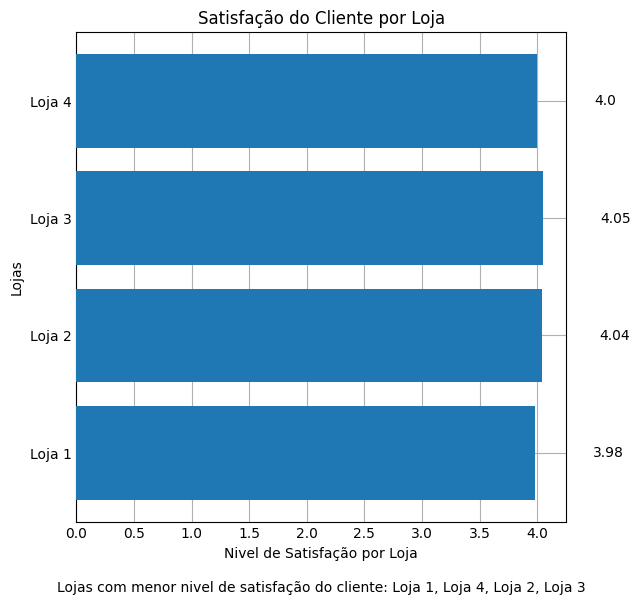

## Os Produtos Mais e Menos Vendidos

Extraindo os dados das lojas, foi constatado o seguinte sobre os produtos mais e menos vendidos:

*   Loja 1 teve como produto mais vendido o **Micro-ondas** e como produto menos vendido o **Headset**.
*   Loja 2 teve como produto mais vendido o **Iniciando em programação** e como produto menos vendido o **Jogo de tabuleiro**.
*   Loja 3 teve como produto mais vendido o **Kit banquetas** e como produto menos vendido os **Blocos de montar**.
*   Loja 4 teve como produto mais vendido o **Cama box** e como produto menos vendido a **Guitarra**.

## Frete Médio de Cada Loja

Extraindo os dados das lojas, foi constatado que o frete médio de cada loja é respectivamente: Loja 1 teve 34,69, Loja 2 teve 33,62, Loja 3 teve 33,07 e Loja 4 teve 31,28.

As lojas com maiores fretes médios são: Loja 1, Loja 2, Loja 3 e Loja 4.

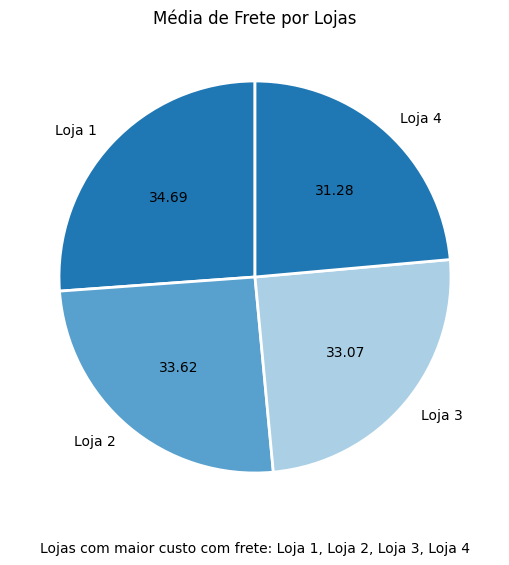

## Qual loja deve ser vendida?

Com base em todas as análises, a loja que deve ser vendida é a **Loja 4**. Pois ela tem o menor nivel de faturamento e segundo menor nivel de satisfação do cliente, que são pontos cruciais para o sucesso da empresa e retorno financeiro.